In [2]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
import requests
import json

In [3]:
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 14
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

In [4]:
emart_df=pd.read_csv('C:/MartRepository/4Mart/data/Emart_info.csv',encoding='utf-8')

In [5]:
lotte_df=pd.read_csv('C:/MartRepository/4Mart/data/lotte.csv',encoding='utf-8')

In [6]:
home_df=pd.read_csv('C:/MartRepository/4Mart/data/Homeplus_shop_info_loc4.csv',encoding='utf-8')


In [7]:
top_df=pd.read_csv('C:/MartRepository/4Mart/data/topmart_shop_info_loc.csv',encoding='utf-8')


In [8]:
mart_df=pd.concat([lotte_df, emart_df,home_df,top_df],axis=0) 

In [9]:
mart_df.to_csv('./mart.csv',encoding='utf-8',index=False)

In [10]:
mart_df = pd.read_csv('./mart.csv',encoding='utf-8')
mart_df.head()

,store,address,Latitude,Longitude,tel
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500


In [11]:
mart_df['brand']=mart_df['store'].str.split().str[0]

In [12]:
mart_df

,store,address,Latitude,Longitude,tel,brand
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,롯데마트
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,롯데마트
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,롯데마트
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,롯데마트
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,롯데마트
...,...,...,...,...,...,...
455,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300,탑마트
456,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000,탑마트
457,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008,탑마트
458,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2,탑마트


In [13]:
mart_df=mart_df[['brand','store','address','Latitude','Longitude','tel']]
mart_df

,brand,store,address,Latitude,Longitude,tel
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500
...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300
456,탑마트,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000
457,탑마트,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008
458,탑마트,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2


In [14]:
mart_df.to_csv('./mart2.csv',encoding='utf-8',index=False)

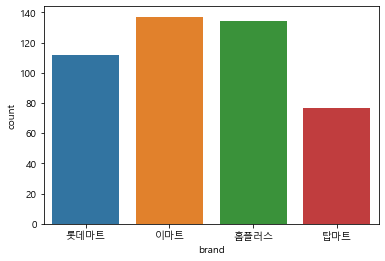

In [15]:
sns.countplot(data=mart_df,x='brand')
plt.show()

In [16]:
mart_df['city']=mart_df['address'].str.split().str[0]
mart_df

C:\Users\admin\AppData\Local\Temp\ipykernel_16336\50026792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mart_df['city']=mart_df['address'].str.split().str[0]


,brand,store,address,Latitude,Longitude,tel,city
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,부산광역시
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,경기도
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,경기도
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,서울특별시
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,경상남도
...,...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300,경상남도
456,탑마트,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000,대구광역시
457,탑마트,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008,경상남도
458,탑마트,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2,경상북도


In [17]:
mart_df=mart_df[['brand','store','city','address','Latitude','Longitude','tel']]
mart_df

,brand,store,city,address,Latitude,Longitude,tel
0,롯데마트,롯데마트 TRU동부산점,부산광역시,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트,롯데마트 TRU파주점,경기도,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트,롯데마트 marketD수원점,경기도,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트,롯데마트 강변점,서울특별시,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트,롯데마트 거제점,경상남도,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500
...,...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300
456,탑마트,탑마트 대구점,대구광역시,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000
457,탑마트,탑마트 물금역점,경상남도,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008
458,탑마트,탑마트 경주용강점,경상북도,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2


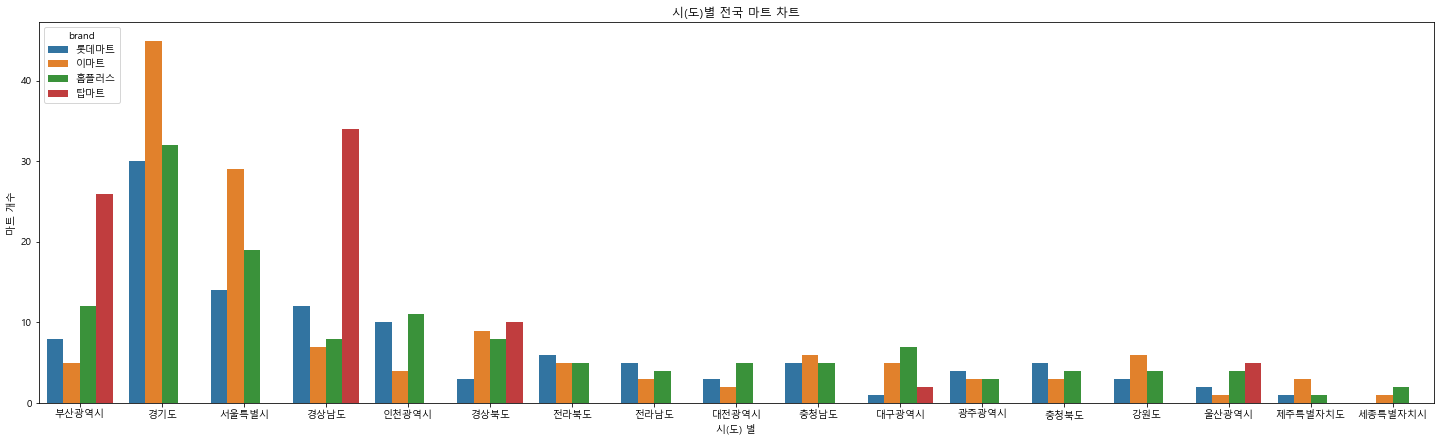

In [18]:
# 시도-마트브랜드 갯수 확인 그래프

plt.figure(figsize=(25, 7))
chart1 = sns.countplot(data=mart_df,x='city', hue='brand')
chart1.set_title('시(도)별 전국 마트 차트')
chart1.set_xlabel('시(도) 별')
chart1.set_ylabel('마트 개수')
plt.show()

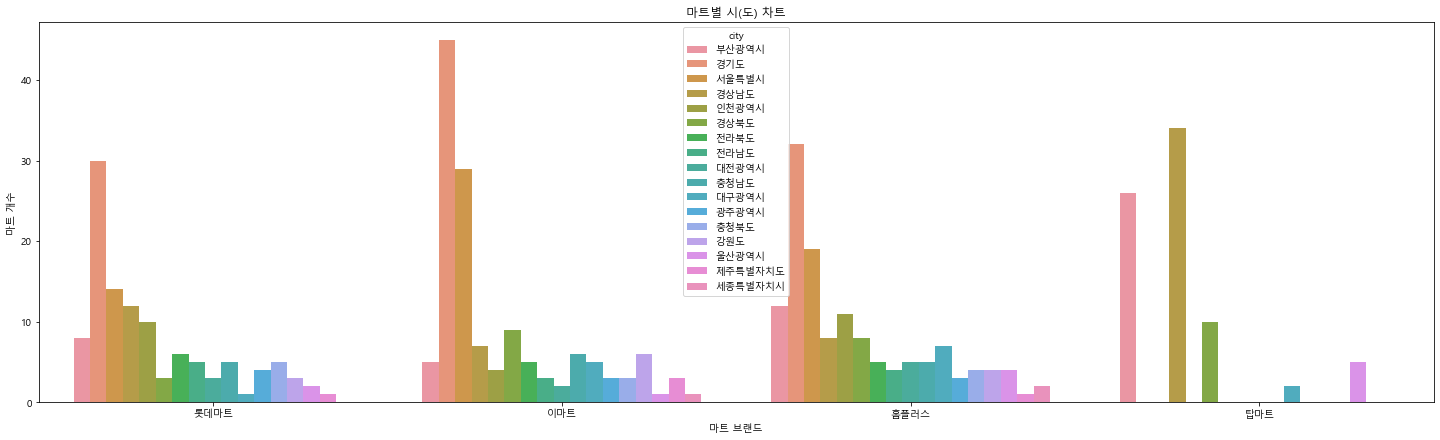

In [19]:
# 시도-마트브랜드 갯수 확인 그래프
plt.figure(figsize=(25, 7))
chart2 = sns.countplot(data=mart_df,x='brand', hue='city')
chart2.set_title('마트별 시(도) 차트')
chart2.set_xlabel('마트 브랜드')
chart2.set_ylabel('마트 개수')
plt.show()

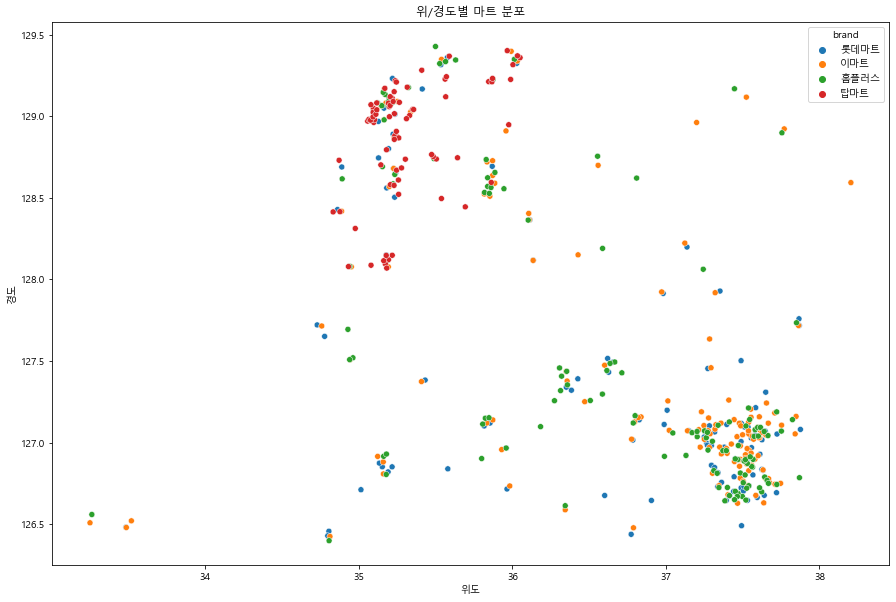

In [20]:
# seaborn의 scatterplot -> x : 경도, y : 위도, hue : 브랜드 시각화
plt.figure(figsize=(15, 10))
chart3 = sns.scatterplot(data=mart_df, x="Latitude", y="Longitude", hue="brand")
chart3.set_title('위/경도별 마트 분포')
chart3.set_xlabel('위도')
chart3.set_ylabel('경도')
plt.show()

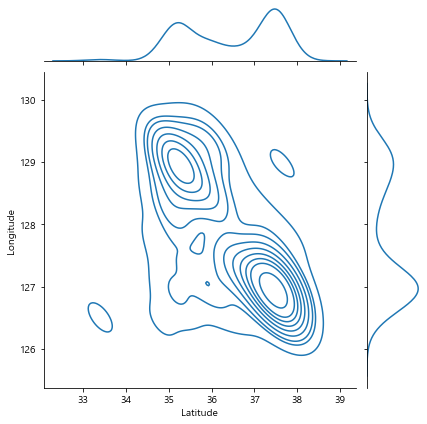

In [21]:
# jointplot 그리기
sns.jointplot(data=mart_df, x="Latitude", y="Longitude", kind="kde")
plt.show()

### 지도 시각화

In [22]:
# [탑마트 ] 위도 & 경도_평균 

lat = top_df['Latitude'].mean()
long = top_df['Longitude'].mean()
(lat, long)

(35.325333771428575, 128.86781882597404)

In [23]:
# [ 탑마트 ] 지도 시각화

map = folium.Map(location=[lat, long], zoom_start=7, tiles='stamen toner')

for i in top_df.index:
    shop_lat = top_df.loc[i, 'Latitude']
    shop_long = top_df.loc[i, 'Longitude']
    title = top_df.loc[i, 'store']

    folium.CircleMarker(location=[shop_lat, shop_long], radius=3, color='orange',
                        tooltip=title).add_to(map)

map


In [24]:
# [ 4마트 ] 위도 & 경도_평균 

lat = mart_df['Latitude'].mean()
long = mart_df['Longitude'].mean()
(lat, long)

(36.42794226152174, 127.71403986913046)

In [25]:
# [ 4마트 ]

map = folium.Map(location=[lat, long], zoom_start=7, tiles='stamen toner')

for i in mart_df.index:
    shop_lat = mart_df.loc[i, 'Latitude']
    shop_long = mart_df.loc[i, 'Longitude']
    title = mart_df.loc[i, 'store']


    if mart_df.loc[i, 'brand'] == '이마트': color='gray'
    if mart_df.loc[i, 'brand'] == '홈플러스': color='red'
    if mart_df.loc[i, 'brand'] == '롯데마트': color='lightgreen'
    if mart_df.loc[i, 'brand'] == '탑마트': color='red'
    

    folium.CircleMarker(location=[shop_lat, shop_long], radius=5, color=color,
                        tooltip=title).add_to(map)

map

### 지도 시각화

In [40]:
# 구별로 그룹핑
df_mart_vs = mart_df.groupby(["brand", "city"])["city"].count()
df_mart_vs.head()

brand  city 
롯데마트   강원도       3
       경기도      30
       경상남도     12
       경상북도      3
       광주광역시     4
Name: city, dtype: int64

In [27]:
# reset_index 로 인덱스를 컬럼으로 만듭니다.
df_mart_vs = df_mart_vs.reset_index(name='count')
df_mart_vs.head()

,brand,city,count
0,롯데마트,강원도,3
1,롯데마트,경기도,30
2,롯데마트,경상남도,12
3,롯데마트,경상북도,3
4,롯데마트,광주광역시,4


In [28]:
df_mart_vs

,brand,city,count
0,롯데마트,강원도,3
1,롯데마트,경기도,30
2,롯데마트,경상남도,12
3,롯데마트,경상북도,3
4,롯데마트,광주광역시,4
5,롯데마트,대구광역시,1
6,롯데마트,대전광역시,3
7,롯데마트,부산광역시,8
8,롯데마트,서울특별시,14
9,롯데마트,울산광역시,2


In [29]:
# 위에서 했던 과정을 pivot_table 로

pivot = pd.pivot_table(data=df_mart_vs,
               index=["brand", "city"], 
               values="count")
pivot

count
brand city          
롯데마트  강원도          3
      경기도         30
      경상남도        12
      경상북도         3
      광주광역시        4
      대구광역시        1
      대전광역시        3
      부산광역시        8
      서울특별시       14
      울산광역시        2
      인천광역시       10
      전라남도         5
      전라북도         6
      제주특별자치도      1
      충청남도         5
      충청북도         5
이마트   강원도          6
      경기도         45
      경상남도         7
      경상북도         9
      광주광역시        3
      대구광역시        5
      대전광역시        2
      부산광역시        5
      서울특별시       29
      세종특별자치시      1
      울산광역시        1
      인천광역시        4
      전라남도         3
      전라북도         5
      제주특별자치도      3
      충청남도         6
      충청북도         3
탑마트   경상남도        34
      경상북도        10
      대구광역시        2
      부산광역시       26
      울산광역시        5
홈플러스  강원도          4
      경기도         32
      경상남도         8
      경상북도         8
      광주광역시        3
      대구광역시        7
      대전광역시        5
      부산광역시       12
      서울특별시       19
      세종특별자치시      2
      울산광역시        4
      인천광역시       11
      전라남도         4
      전라북도         5
      제주특별자치도      1
      충청남도         5
      충청북도         4

In [30]:
geo_path = 'C:/MartRepository/4Mart/Emart/TL_SCCO_CTPRVN.json'
geo_path

with open(geo_path, encoding='utf-8') as file:
    geo_path = json.load(file)

# geo_json = json.load(open(geo_path, encoding="utf-8"))

In [31]:
geo_path['features'][3]['properties']

{'CTPRVN_CD': '47', 'CTP_ENG_NM': 'Gyeongsangbuk-do', 'CTP_KOR_NM': '경상북도'}

In [32]:
Emart_geo = df_mart_vs[df_mart_vs["brand"] == "이마트"].copy()
Emart_geo.head()

,brand,city,count
16,이마트,강원도,6
17,이마트,경기도,45
18,이마트,경상남도,7
19,이마트,경상북도,9
20,이마트,광주광역시,3


In [33]:
# 이마트 지오매트리

m = folium.Map([lat, long], zoom_start=7)

folium.Choropleth(
    geo_data=geo_path,
    name='choropleth',
    data=Emart_geo,
    columns=['city', 'count'],
    key_on='properties.CTP_KOR_NM',
    fill_color='Set2',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이마트 매장수'
).add_to(m)

m

In [34]:
homeplus_geo = df_mart_vs[df_mart_vs["brand"] == "홈플러스"].copy()
homeplus_geo.head()

,brand,city,count
38,홈플러스,강원도,4
39,홈플러스,경기도,32
40,홈플러스,경상남도,8
41,홈플러스,경상북도,8
42,홈플러스,광주광역시,3


In [35]:
m = folium.Map([lat, long], zoom_start=7)

folium.Choropleth(
    geo_data=geo_path,
    name='choropleth',
    data=homeplus_geo,
    columns=['city', 'count'],
    key_on='properties.CTP_KOR_NM',
    fill_color='Pastel1',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='홈플러스 매장수'
).add_to(m)

m

In [36]:
lotte_geo = df_mart_vs[df_mart_vs["brand"] == "롯데마트"].copy()
lotte_geo.head()

,brand,city,count
0,롯데마트,강원도,3
1,롯데마트,경기도,30
2,롯데마트,경상남도,12
3,롯데마트,경상북도,3
4,롯데마트,광주광역시,4


In [37]:
m = folium.Map([lat, long], zoom_start=7)

folium.Choropleth(
    geo_data=geo_path,
    name='choropleth',
    data=lotte_geo,
    columns=['city', 'count'],
    key_on='properties.CTP_KOR_NM',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='롯데마트 매장수'
).add_to(m)

m

In [38]:
top_geo = df_mart_vs[df_mart_vs["brand"] == "탑마트"].copy()
top_geo.head()

,brand,city,count
33,탑마트,경상남도,34
34,탑마트,경상북도,10
35,탑마트,대구광역시,2
36,탑마트,부산광역시,26
37,탑마트,울산광역시,5


In [39]:
m = folium.Map([lat, long], zoom_start=7)

folium.Choropleth(
    geo_data=geo_path,
    name='choropleth',
    data=top_geo,
    columns=['city', 'count'],
    key_on='properties.CTP_KOR_NM',
    fill_color='PRGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='탑마트 매장수',
).add_to(m)

m